In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
from scipy.linalg import null_space
import math
from collections import deque

from utils import *

%matplotlib inline

In [2]:
def simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0):#, weights_n, weights_e, weights_f):
    return omega_0-a*(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.sin(B1.dot(theta)))
#     return omega_0-a*np.diag(we).dot(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.diag(wf).dot(np.sin(B1.dot(theta))))

def integrate_simplicial_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0):#, weights_n, weights_e, weights_f):
    return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)
#     return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0, degree, weights_n, weights_e, weights_f), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)

In [3]:
def ntri(A):
    # signed incidence matrices for triangles
    Nn=A.shape[0]
    Ne=int(np.sum(A)/2)
    #print Nn, Ne

    e=np.zeros((Ne,2))
    count=0;
    for i in range(Nn):
        for j in range(i+1,Nn):
            if(A[i,j]>0):
                e[count,0]=i
                e[count,1]=j
                count+=1
#     print "edges"
#     print e
    I=np.zeros((Ne,Nn))
    for i in range(Ne):
        I[i,int(e[i,0])]=1
        I[i,int(e[i,1])]=-1
    #print I

    Nf=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    Nf+=1
    f=np.zeros((Nf,3))
    count=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    f[count,0]=i
                    f[count,1]=j
                    f[count,2]=k
                    count+=1
#     print "faces"
#     print f
    II=np.zeros((Nf,Ne))
    for i in range(f.shape[0]):
        for j in [0,-1,-2]:
            temp=np.roll(f[i,:],j)
            temp=temp[0:2]
            for k in range(e.shape[0]):
                #print e[k,:],temp
                if(((e[k,:]==temp).all())or((e[k,:]==np.roll(temp,1)).all())):
                    Irow=k
            if(temp[0]<temp[1]):
                II[i,Irow]=1
            else:
                II[i,Irow]=-1
    #print II 
    ntrie=np.sum(II,1)
    return I,II#,ntrie, e#, len(ntrie)

In [4]:
def plotflow(theta_0,B0,B1,plotname,t_max=110,n_t=200,verbose=1,figurose=1):
    print(plotname)
    omega_0=np.ones(B0.shape[0])*0
    degree=np.absolute(B0).sum(0)
    a=1
#     t_max = 110 #integration time
#     n_t = 200 #number of timepoints 

    result=integrate_simplicial_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0)
    times = result.t
    theta = result.y
    
    if(figurose==1):
        plt.figure()
        plt.imshow(np.mod(np.around(theta,10),np.around(2*np.pi,10)), aspect='auto',cmap='bwr')
        plt.title(plotname+' phases')
        plt.colorbar()

        op=order_parameter(theta, 4, 1)
        plt.figure()
        plt.title(plotname+' order parameter')
        plt.plot(op[0,:])

    if(verbose==1):
        print('\theta_0: ', theta_0)
        print('\theta_final: ',theta[:,-1])

        Div=np.mod(np.around(B0.T.dot(theta),10),np.around(2*np.pi,10))
        Curl=np.mod(np.around(B1.dot(theta),10),np.around(2*np.pi,10))
        print('Div: (must be zeros for solutions)', Div[:,-1])
        print('Curl: ', Curl[:,-1])

        L1=-B0.dot(B0.T)-B1.T.dot(B1)
        print('L1\theta must be zero, second one row is modulo 2pi')
        print('L1\theta: ', L1.dot(theta[:,-1]))
        print('L1\theta:', np.mod(np.around(L1.dot(theta[:,-1]),10),np.around(2*np.pi,10)))
        print('dim(Ker(L1)): ', null_space(L1).shape[1])
        print('Ker(L1): ', null_space(L1))
    
#     plt.figure()
#     plt.imshow(Div, aspect='auto',cmap='bwr')
#     plt.title(plotname+' divergence')
#     plt.colorbar()
#     plt.figure()
#     plt.imshow(Curl, aspect='auto',cmap='bwr')
#     plt.title(plotname+' curl')
#     plt.colorbar()
    return theta[:,-1]

(33, 1)
(32, 2)
(31, 3)
(30, 4)
(29, 5)
(28, 6)
(27, 7)
(26, 8)
(25, 9)
(24, 10)
(23, 11)
(22, 12)
(21, 13)
(20, 14)
(19, 15)
(18, 16)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:511: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is dep

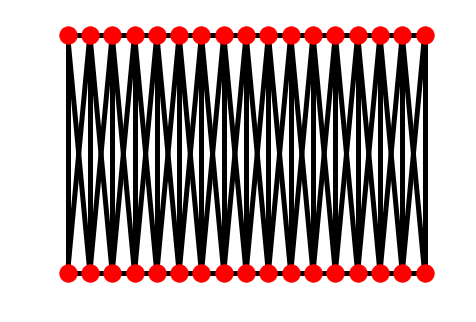

In [5]:
Ns=16
Nn=4+2*(Ns-1)
Ne=7+3*(Ns-2)

#     G=nx.cycle_graph(Nn)
G=nx.Graph()
for n in range(Nn/2):
    G.add_node(n,pos=(n,0))
    G.add_node(Nn-(n+1),pos=(n,1))

nl=deque(G.nodes())
for n in range(Nn):
    nl.rotate(-1)
    G.add_edge(nl[0],nl[1])

Nvert=Ns-1
Ndiag=Ns

for n in range(Nvert):
    G.add_edge(0+(n+1),Nn-(n+2))
for n in range(Ndiag):
    G.add_edge(0+(n),Nn-(n+2))
    print(Nn-(n+1),n+1)
    G.add_edge(Nn-(n+1),0+(n+1))


pos=nx.get_node_attributes(G,'pos')

# print(pos)
plt.figure()
nx.draw(G,pos=pos,width=5,label=False)
# nx.draw_networkx_edges(G,pos=pos,edges=edges,edge_color=colours,width=5)
plt.savefig('foo.png')
plt.show()

In [6]:
def square_world(Ns=2):
    Nn=4+2*(Ns-1)
    Ne=7+3*(Ns-2)
    
#     G=nx.cycle_graph(Nn)
    G=nx.Graph()
    for n in range(Nn/2):
        G.add_node(n,pos=(n,0))
        G.add_node(Nn-(n+1),pos=(n,1))
    
    nl=deque(G.nodes())
    for n in range(Nn):
        nl.rotate(-1)
        G.add_edge(nl[0],nl[1])
    
    Nvert=Ns-1
    Ndiag=Ns-2

    for n in range(Nvert):
        G.add_edge(0+(n+1),Nn-(n+2))
    for n in range(Ndiag):
        G.add_edge(0+(n+1),Nn-(n+3))
    
    A=nx.to_numpy_matrix(G)
    B0,B1=ntri(A)
    
    return G,B0,B1

d=18


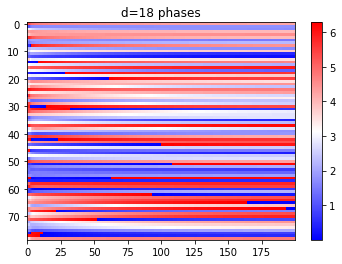

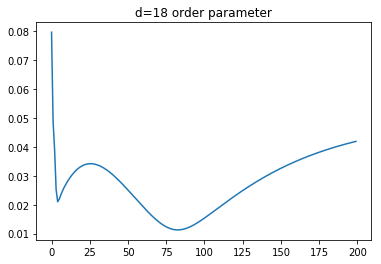

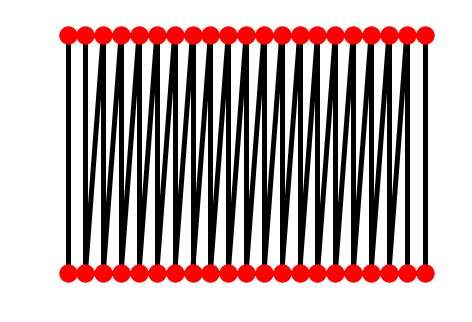

(0.5122883481485554, 0.8858951464872188)


In [7]:
Ns=20

G,B0,B1=square_world(Ns)

Nn=B0.shape[1]
Ne=B0.shape[0]
Nf=B1.shape[0]

np.random.seed(seed=4444)
theta_0=2*np.pi*np.random.rand(Ne)
theta_final=plotflow(theta_0,B0,B1,'d='+str(Ns-2),110,200,0,1)
G,B0,B1=square_world(Ns)

cycle1_nodes=[0, 1, Nn-2, Nn-1]
cycle2_nodes=[Nn/2-2, Nn/2-1, Nn/2, Nn/2+1]

cycle1_edges=[]
cycle2_edges=[]
nl1=deque(cycle1_nodes)
nl2=deque(cycle2_nodes)
for n in range(4):
    nl1.rotate(-1)
    nl2.rotate(-1)
    for r in range(B0.shape[0]):
        if((B0[r,nl1[0]]!=0) and (B0[r,nl1[1]]!=0)):
            cycle1_edges.append(r)
        if((B0[r,nl2[0]]!=0) and (B0[r,nl2[1]]!=0)):
            cycle2_edges.append(r)

nx.set_edge_attributes(G,'phase',1)
# print(cycle1_edges)
# print(cycle2_edges)
for i,e in enumerate(G.edges()):
    G[e[0]][e[1]]['phase']=theta_final[i]

# print(B0)
# print(G.edges(data=True))

pos=nx.get_node_attributes(G,'pos')
edges=G.edges()
colours=[G[e[0]][e[1]]['phase'] for e in G.edges()]

plt.figure()
nx.draw(G,pos=pos,width=5,label=False)
# nx.draw_networkx_edges(G,pos=pos,edges=edges,edge_color=colours,width=5)
plt.show()

synch1=np.absolute(np.exp(1j*theta_final[cycle1_edges]).sum(0))/4
synch2=np.absolute(np.exp(1j*theta_final[cycle2_edges]).sum(0))/4
print(synch1,synch2)

In [8]:
synch1=[]
synch2=[]

for i,Ns in enumerate(range(2,20)):

    G,B0,B1=square_world(Ns)

    Nn=B0.shape[1]
    Ne=B0.shape[0]
    Nf=B1.shape[0]

#     np.random.seed(seed=4444)
    theta_0=2*np.pi*np.random.rand(Ne)
    theta_final=plotflow(theta_0,B0,B1,'d='+str(Ns-2),110,200,0,0)
    G,B0,B1=square_world(Ns)

    cycle1_nodes=[0, 1, Nn-2, Nn-1]
    cycle2_nodes=[Nn/2-2, Nn/2-1, Nn/2, Nn/2+1]

    cycle1_edges=[]
    cycle2_edges=[]
    nl1=deque(cycle1_nodes)
    nl2=deque(cycle2_nodes)
    for n in range(4):
        nl1.rotate(-1)
        nl2.rotate(-1)
        for r in range(B0.shape[0]):
            if((B0[r,nl1[0]]!=0) and (B0[r,nl1[1]]!=0)):
                cycle1_edges.append(r)
            if((B0[r,nl2[0]]!=0) and (B0[r,nl2[1]]!=0)):
                cycle2_edges.append(r)

    nx.set_edge_attributes(G,'phase',1)
    # print(cycle1_edges)
    # print(cycle2_edges)
    for i,e in enumerate(G.edges()):
        G[e[0]][e[1]]['phase']=theta_final[i]

    # print(B0)
    # print(G.edges(data=True))

    pos=nx.get_node_attributes(G,'pos')
    edges=G.edges()
    colours=[G[e[0]][e[1]]['phase'] for e in G.edges()]

#     plt.figure()
#     nx.draw_networkx(G,pos=pos,label=True)
#     nx.draw_networkx_edges(G,pos=pos,edges=edges,edge_color=colours,width=5)
#     plt.show()

    synch1.append(np.absolute(np.exp(1j*theta_final[cycle1_edges]).sum(0))/4)
    synch2.append(np.absolute(np.exp(1j*theta_final[cycle2_edges]).sum(0))/4)

d=0
d=1
d=2
d=3
d=4
d=5
d=6
d=7
d=8
d=9
d=10
d=11
d=12
d=13
d=14
d=15
d=16
d=17


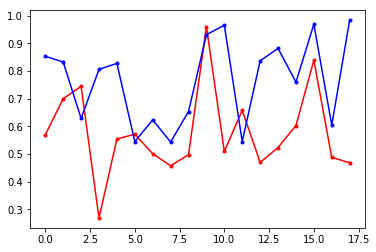

In [9]:
plt.figure()
plt.plot(synch1,'r.-')
plt.plot(synch2,'b.-')
plt.show()